The name of each dimension of dataset used here is (time, latitude, longitude).  
However, sometimes it can different from it, such as (time, lat, lon).  
In that case, you should check the description of your dataset and change codes below properly.

# module load

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import copy
from global_land_mask import globe

# Data load

## get data

In [2]:
def load_data(path):
    data_nc = xr.open_dataset(path)
    # save all the variables in data_nc file as a list.
    var_list = list(data_nc.data_vars.keys())
    
    #if the index of a variable of interest is not 0, 
    #you could edit the index number from 0 to other number in the very below line.
    var = var_list[0]
    data = data_nc.data_vars[var]
    print("completely load data with variable \"{0}\"".format(var))
    return data

In [3]:
path = 'ERA5_monthly_averaged_1959-2022_2mtemp.nc'
data = load_data(path)

completely load data with variable "t2m"


sometimes there is a variable called as "expver" in ERA5 data.  
expver = Identifies the experiment or model version  
I combined expver 1 and 5 here.  
ln[14] https://unseen-open.readthedocs.io/en/latest/Notebooks/Global_monthly_temperature_records_ERA5.html

In [4]:
data = data.sel(expver=1).combine_first(data.sel(expver=5))
data.load()

<xarray.DataArray 't2m' (time: 768, latitude: 721, longitude: 1440)>
array([[[244.4074 , 244.4074 , 244.4074 , ..., 244.4074 , 244.4074 ,
         244.4074 ],
        [244.27869, 244.27869, 244.27869, ..., 244.27692, 244.27692,
         244.27692],
        [244.14468, 244.14468, 244.14644, ..., 244.13939, 244.13939,
         244.14116],
        ...,
        [245.0351 , 245.03334, 245.03334, ..., 245.03687, 245.03687,
         245.0351 ],
        [244.91696, 244.91519, 244.91519, ..., 244.91696, 244.91696,
         244.91696],
        [244.69833, 244.69833, 244.69833, ..., 244.69833, 244.69833,
         244.69833]],

       [[240.96211, 240.96211, 240.96211, ..., 240.96211, 240.96211,
         240.96211],
        [240.79813, 240.79813, 240.79813, ..., 240.7999 , 240.79813,
         240.79813],
        [240.6518 , 240.6518 , 240.6518 , ..., 240.6518 , 240.6518 ,
         240.6518 ],
...
        [235.237  , 235.23524, 235.23524, ..., 235.237  , 235.237  ,
         235.237  ],
        [235.3093 , 235.3093 , 235.3093 , ..., 235.3093 , 235.3093 ,
         235.3093 ],
        [235.00427, 235.00427, 235.00427, ..., 235.00427, 235.00427,
         235.00427]],

       [[249.7975 , 249.7975 , 249.7975 , ..., 249.7975 , 249.7975 ,
         249.7975 ],
        [250.16777, 250.16953, 250.16953, ..., 250.166  , 250.166  ,
         250.16777],
        [250.35995, 250.36348, 250.367  , ..., 250.35466, 250.35643,
         250.35818],
        ...,
        [244.75475, 244.75475, 244.75299, ..., 244.76004, 244.75827,
         244.75652],
        [244.71773, 244.71773, 244.71596, ..., 244.71948, 244.71948,
         244.71948],
        [244.45148, 244.45148, 244.45148, ..., 244.45148, 244.45148,
         244.45148]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2022-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [5]:
# Confirm the dimension of the data
# Mostly, (time, lat, lon)
data.shape

(768, 721, 1440)

# Transform longitude 

Longitude in ERA5 is a range of 0 ~ 360 degree.  
It has to be transformed into -180 ~ 180 degree.

In [6]:
def trans_lon(data):
    data_ = data.assign_coords({"longitude" : (((data.longitude + 180) % 360) - 180)})
    data_ = data_.sortby("longitude")
    return data_

In [7]:
data = trans_lon(data)
data

<xarray.DataArray 't2m' (time: 768, latitude: 721, longitude: 1440)>
array([[[244.4074 , 244.4074 , 244.4074 , ..., 244.4074 , 244.4074 ,
         244.4074 ],
        [244.54846, 244.54846, 244.54846, ..., 244.55022, 244.55022,
         244.55022],
        [244.65425, 244.65248, 244.65248, ..., 244.656  , 244.656  ,
         244.65425],
        ...,
        [243.85728, 243.86081, 243.86433, ..., 243.84317, 243.8467 ,
         243.85023],
        [244.33687, 244.33864, 244.3404 , ..., 244.32982, 244.33157,
         244.33511],
        [244.69833, 244.69833, 244.69833, ..., 244.69833, 244.69833,
         244.69833]],

       [[240.96211, 240.96211, 240.96211, ..., 240.96211, 240.96211,
         240.96211],
        [241.12785, 241.12785, 241.12785, ..., 241.12785, 241.12785,
         241.12785],
        [241.30064, 241.30064, 241.30064, ..., 241.30064, 241.30064,
         241.30064],
...
        [234.69041, 234.69571, 234.69923, ..., 234.67807, 234.6816 ,
         234.68512],
        [234.96371, 234.96547, 234.96724, ..., 234.95667, 234.95842,
         234.96194],
        [235.00427, 235.00427, 235.00427, ..., 235.00427, 235.00427,
         235.00427]],

       [[249.7975 , 249.7975 , 249.7975 , ..., 249.7975 , 249.7975 ,
         249.7975 ],
        [249.69699, 249.69699, 249.69876, ..., 249.69699, 249.69699,
         249.69699],
        [249.44485, 249.44485, 249.44485, ..., 249.44485, 249.44485,
         249.44485],
        ...,
        [244.25752, 244.2593 , 244.26282, ..., 244.24695, 244.24872,
         244.25224],
        [244.50613, 244.50966, 244.51143, ..., 244.50261, 244.50438,
         244.50438],
        [244.45148, 244.45148, 244.45148, ..., 244.45148, 244.45148,
         244.45148]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2022-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

# Make array containing information whether each grid point is land or ocean.

In [8]:
# Make arrays for longitude, and latitude coordinates of the data. 
lon = np.array(data.longitude)
lat = np.array(data.latitude)

longitude, latitude = np.meshgrid(lon,lat)

global_land_mask contains script for checking whether a lat/lon point is on land or sea.  
global mask is of shape (21600, 43200), sampling the entire earth at 1km reslution.  
globe.is_land() returns an array with a size of (data.lat, data.lon).  
returned array is containing information whether each grid point is land (TRUE) or ocean (FALSE)  
Refer to https://pypi.org/project/global-land-mask/

In [9]:
landmask = globe.is_land(latitude,longitude)
landmask.shape

(721, 1440)

# Change the value of ocean grid point into 'Nan'
(Mask out ocean grid point.)

In [10]:
data_land = copy.deepcopy(data)
data_land

<xarray.DataArray 't2m' (time: 768, latitude: 721, longitude: 1440)>
array([[[244.4074 , 244.4074 , 244.4074 , ..., 244.4074 , 244.4074 ,
         244.4074 ],
        [244.54846, 244.54846, 244.54846, ..., 244.55022, 244.55022,
         244.55022],
        [244.65425, 244.65248, 244.65248, ..., 244.656  , 244.656  ,
         244.65425],
        ...,
        [243.85728, 243.86081, 243.86433, ..., 243.84317, 243.8467 ,
         243.85023],
        [244.33687, 244.33864, 244.3404 , ..., 244.32982, 244.33157,
         244.33511],
        [244.69833, 244.69833, 244.69833, ..., 244.69833, 244.69833,
         244.69833]],

       [[240.96211, 240.96211, 240.96211, ..., 240.96211, 240.96211,
         240.96211],
        [241.12785, 241.12785, 241.12785, ..., 241.12785, 241.12785,
         241.12785],
        [241.30064, 241.30064, 241.30064, ..., 241.30064, 241.30064,
         241.30064],
...
        [234.69041, 234.69571, 234.69923, ..., 234.67807, 234.6816 ,
         234.68512],
        [234.96371, 234.96547, 234.96724, ..., 234.95667, 234.95842,
         234.96194],
        [235.00427, 235.00427, 235.00427, ..., 235.00427, 235.00427,
         235.00427]],

       [[249.7975 , 249.7975 , 249.7975 , ..., 249.7975 , 249.7975 ,
         249.7975 ],
        [249.69699, 249.69699, 249.69876, ..., 249.69699, 249.69699,
         249.69699],
        [249.44485, 249.44485, 249.44485, ..., 249.44485, 249.44485,
         249.44485],
        ...,
        [244.25752, 244.2593 , 244.26282, ..., 244.24695, 244.24872,
         244.25224],
        [244.50613, 244.50966, 244.51143, ..., 244.50261, 244.50438,
         244.50438],
        [244.45148, 244.45148, 244.45148, ..., 244.45148, 244.45148,
         244.45148]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2022-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [11]:
for lat in range(0, data.shape[1]):
    for lon in range(0,data.shape[2]):
        if landmask[lat,lon]== False:
            # if (lat,lon) is ocean, change value into Nan
            data_land[:,lat,lon] = np.nan

In [12]:
data_land

<xarray.DataArray 't2m' (time: 768, latitude: 721, longitude: 1440)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [243.85728, 243.86081, 243.86433, ..., 243.84317, 243.8467 ,
         243.85023],
        [244.33687, 244.33864, 244.3404 , ..., 244.32982, 244.33157,
         244.33511],
        [244.69833, 244.69833, 244.69833, ..., 244.69833, 244.69833,
         244.69833]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [234.69041, 234.69571, 234.69923, ..., 234.67807, 234.6816 ,
         234.68512],
        [234.96371, 234.96547, 234.96724, ..., 234.95667, 234.95842,
         234.96194],
        [235.00427, 235.00427, 235.00427, ..., 235.00427, 235.00427,
         235.00427]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [244.25752, 244.2593 , 244.26282, ..., 244.24695, 244.24872,
         244.25224],
        [244.50613, 244.50966, 244.51143, ..., 244.50261, 244.50438,
         244.50438],
        [244.45148, 244.45148, 244.45148, ..., 244.45148, 244.45148,
         244.45148]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2022-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

# Check the result

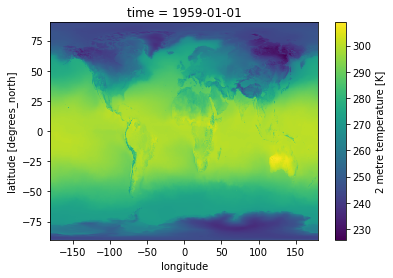

In [13]:
# Before masking
data[0].plot()

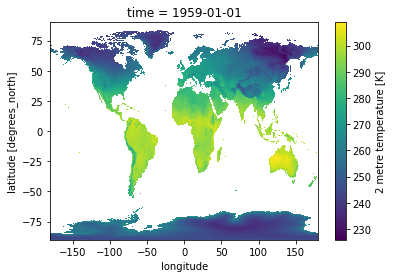

In [14]:
# After masking
data_land[0].plot()

In [15]:
# Save masked dataset into new .nc file
data_land.to_netcdf(path = 'ERA5_landm_monthly_averaged_1959-2022_2mtemp.nc')